# Friendship Paradox Biases Perceptions in Directed Networks
### This notebook is experimental results of [this paper](https://arxiv.org/pdf/1905.05286.pdf).

In [23]:
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter


plt.style.use('ggplot')
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = False
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = 22

def mean_std_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, np.var(a), h

# 2.1 Four Variants of the Friendship Paradox in Directed Networks

### Preprocessing

In [2]:
# Reading list of nodes - for seed users - 
seed_users = pd.read_csv("Data/Seed_users.csv")
print ("Number of seed users = {}".format(len(seed_users)))

# Reading list of edges for seed users subgraph 
all_edges = pd.read_csv("Data/User_graph.csv")
edges = all_edges[all_edges['from'].isin(seed_users['user_id']) & all_edges['to'].isin(seed_users['user_id'])]
print ("Number of edges in seed subgraph = {}".format(len(edges)))

Number of seed users = 5599
Number of edges in seed subgraph = 691771


In [3]:
# Processing in-degree and out-degree of all seed nodes 
seed_out_deg = edges.groupby(['to']).size().to_dict()
seed_in_deg = edges.groupby(['from']).size().to_dict()

for usr in seed_users['user_id']:
    if usr not in seed_in_deg:
        seed_in_deg[usr] = 0
    if usr not in seed_out_deg:
        seed_out_deg[usr] = 0

# Joining in-degree and out-degree to edges dataframe 
pd.options.mode.chained_assignment = None
edges['follower_in_deg'] = edges['from'].map(seed_in_deg)
edges['follower_out_deg'] = edges['from'].map(seed_out_deg)
edges['friend_in_deg'] = edges['to'].map(seed_in_deg)
edges['friend_out_deg'] = edges['to'].map(seed_out_deg)

# Counting number of occurrences of 4 types of Friendship Paradox
friends_have_more_followers = edges[edges['friend_out_deg'] > edges['follower_out_deg']].groupby(['follower_in_deg']).size().to_dict()
friends_have_more_friends = edges[edges['friend_in_deg'] > edges['follower_in_deg']].groupby(['follower_in_deg']).size().to_dict()
followers_have_more_followers = edges[edges['follower_out_deg'] > edges['friend_out_deg']].groupby(['friend_out_deg']).size().to_dict()
followers_have_more_friends = edges[edges['follower_in_deg'] > edges['friend_in_deg']].groupby(['friend_out_deg']).size().to_dict()

# Counting the *possible* number of occurrences of 4 types Friendship Paradox
seed_out_deg_outof = dict(Counter(seed_out_deg.values()))
seed_in_deg_outof = dict(Counter(seed_in_deg.values()))

for k, v in seed_out_deg_outof.items():
    seed_out_deg_outof[k] = k * v
    
for k, v in seed_in_deg_outof.items():
    seed_in_deg_outof[k] = k * v


In [5]:
pickle.dump(seed_out_deg_outof, open('store_results/seed_out_deg_outof.p', 'wb'))
pickle.dump(seed_in_deg_outof, open('store_results/seed_in_deg_outof.p', 'wb'))
pickle.dump(friends_have_more_followers, open('store_results/friends_have_more_followers.p', 'wb'))
pickle.dump(friends_have_more_friends, open('store_results/friends_have_more_friends.p', 'wb'))
pickle.dump(followers_have_more_followers, open('store_results/followers_have_more_followers.p', 'wb'))
pickle.dump(followers_have_more_friends, open('store_results/followers_have_more_friends.p', 'wb'))

### Plots

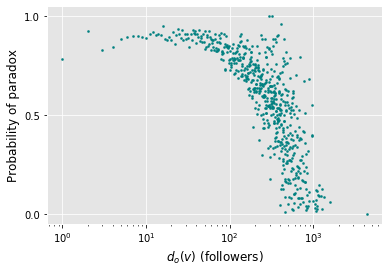

In [6]:
X = sorted(friends_have_more_followers.keys())
Y = [float(friends_have_more_followers[el]) / float(seed_in_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_o(v)$ (followers)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Friends have more followers")
plt.savefig("Plots/friends_have_more_followers.pdf", bbox_inches='tight')
plt.show()

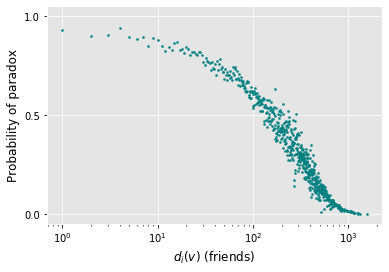

In [7]:
X = sorted(friends_have_more_friends.keys())
Y = [float(friends_have_more_friends[el]) / float(seed_in_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_i(v)$ (friends)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Friends have more friends")
plt.savefig("Plots/friends_have_more_friends.pdf", bbox_inches='tight')
plt.show()

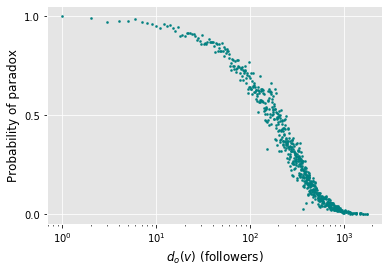

In [8]:
X = sorted(followers_have_more_followers.keys())
Y = [float(followers_have_more_followers[el]) / float(seed_out_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_o(v)$ (followers)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Followers have more followers")
plt.savefig("Plots/followers_have_more_followers.pdf", bbox_inches='tight')
plt.show()

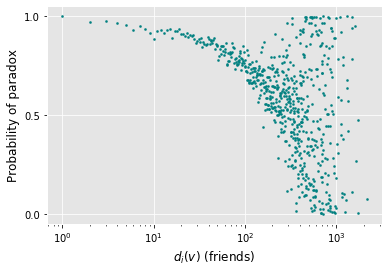

In [9]:
X = sorted(followers_have_more_friends.keys())
Y = [float(followers_have_more_friends[el]) / float(seed_out_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_i(v)$ (friends)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Followers have more friends")
plt.savefig("Plots/followers_have_more_friends.pdf", bbox_inches='tight')
plt.show()

# 2.2 Perception Biases in Directed Networks

### Preprocessing

In [10]:
# Reading actions (tweets & retweets) of important hashtags
actions = pd.read_csv("Data/actions.csv")
actions = actions.sort_values('time')
actions = actions.drop_duplicates(['user', 'hashtag'], keep='first')
print ("# of actions = {}".format(len(actions)))

important_hashtags = list(set(actions['hashtag']))
print ("# of important hashtags = {}".format(len(important_hashtags)))

# Grouping actions by hashtags to have list of users who used the hashtag
actions_gr = actions.groupby('hashtag')['user'].apply(list)

# Reading the network and computing in-degree and out-degree of nodes 
graph = pd.read_csv("Data/User_graph.csv")
all_users = list(set(graph['from']).union(set(graph['to'])))
print ("# of users = {}".format(len(all_users)))

in_deg = graph.groupby('from').size().to_dict()
print ("len(in_deg) = {}".format(len(in_deg)))

out_deg = graph.groupby('to').size().to_dict()
for ind, usr in enumerate(all_users):
    if usr not in out_deg:
        out_deg[usr] = 0
print ("len(out_deg) = {}".format(len(out_deg)))

# of actions = 3195273
# of important hashtags = 1153
# of users = 677411
len(in_deg) = 5569
len(out_deg) = 677411


In [11]:
# Input: list of users who used a hashtag
# Output: E{f(X)}, E{f(Y)} and Q_f(v) for all v in nodes
def get_perceptions(list_of_users):
    list_of_users = set(list_of_users).intersection(all_users)
    expected_fx = float(len(list_of_users)) / float(len(all_users))
    
    num_followers = list(graph.loc[graph['to'].isin(list_of_users)]['from'])  
    expected_fy = float(len(num_followers)) / float(len(graph))
    
    saw_hashtag = dict(Counter(list(graph.loc[graph['to'].isin(list_of_users)]['from'])))
    q_f_nodes = dict()
    for usr, time in saw_hashtag.items():
        q_f_nodes[usr] = float(time) / float(in_deg[usr])
    
    return expected_fx, expected_fy, q_f_nodes

# Computing local_bias, and global_bias for all hashtags
local_bias = dict()
global_bias = dict()

expected_fx = dict()
expected_fy = dict()
q_f_nodes = dict()
expected_q_f_nodes = dict()

for hsh in important_hashtags:
    print (hsh, end = ' ')
    usrs_used_hashtag = actions_gr[hsh]
    expected_fx[hsh], expected_fy[hsh], q_f_nodes[hsh] = get_perceptions(usrs_used_hashtag)
    
    expected_q_f_nodes[hsh] = sum(q_f_nodes[hsh].values()) / len(in_deg)
    local_bias[hsh] = expected_q_f_nodes[hsh] - expected_fx[hsh]
    global_bias[hsh] = expected_fy[hsh] - expected_fx[hsh]


indonesia smile guardiansofthegalaxy mktg k12 earthquake etsy sanfrancisco cuba dream jazz detroit equality linkedin asmsg israelunderfire cats devops ncaa wikileaks blogging go ma pizza weekend healthcare heartbleed support mathchat mentalhealth prayer t entrepreneur thailand kids parenting ibm rock cx emmy marketing usa hot michigan motivationmonday comingsoon mondaymotivation supersoulsunday abortion life commonwealthgames oscars packers help kindle handmade animals leadfromwithin ferguson brunch txlege travel c4news f4f ufc onenationoneteam ravens breakingnews ecommerce bostonmarathon robinwilliams lp saas redskins edreform party bi inspiring dc le vintage raisethewage oakland coffee berlin gerarg olympics miami wiunion ramadan uk az smm space it europe libra nfldraft jesus d protip oregon neverforget streetart cslewis tcot pittsburgh parents festival socbiz sochi2014 vma ita hcsm startrek diversity motivation sdcc2014 wearewinter 1 hope royalbaby vc fun artists nowplaying tgdn bts

mikebrown foodporn painting authors 1u netflix humor philippines congress marchmadness yes icebucketchallenge conservation management b seo hurricane virgos nokidhungry socialgood movie sotu college arts freedom sm filmmaking obamacare kidlit followback mustfollow crm diy sagittarius bloggers occupy hawaii microsoft samsung afc ebook digitalhealth photos video data wine apollo45 social bcpoli giveaway ya gay wtf luxury kickstarter entrepreneurs roc the constantcontact london vacation recruiting ocean gemini ebola teaparty socialmedia teens losangeles solidarity glasgow2014 technology volunteer iraq 

In [12]:
pickle.dump(expected_fx, open("store_results/expected_fx.p", "wb"))
pickle.dump(expected_fy, open("store_results/expected_fy.p", "wb"))
pickle.dump(q_f_nodes, open("store_results/q_f_nodes.p", "wb"))
pickle.dump(local_bias, open("store_results/local_bias.p", "wb"))
pickle.dump(global_bias, open("store_results/global_bias.p", "wb"))

In [13]:
# Input: hashtag
# Output: perception of individuals of the network about the hashtag
def get_individual_local_bias(hsh):
    hsh_local_bias = []
    for usr, ind in in_deg.items():
        tmp = -1 * expected_fx[hsh]
        if usr in q_f_nodes[hsh]:
            tmp += q_f_nodes[hsh][usr]
        hsh_local_bias.append(tmp)
    return hsh_local_bias

# Aggregating perceptions of all individuals for all hashtags
all_individual_local_bias = []
for hsh in important_hashtags:
    all_individual_local_bias.extend(get_individual_local_bias(hsh))

In [14]:
pickle.dump(all_individual_local_bias, open("store_results/all_individual_local_bias.p", "wb"))

In [18]:
# Extracting the ranking of hashtags based on local bias
local_bias_ranking = sorted(local_bias.items(), key=lambda k:k[1], reverse=True)

rank_hashtag_local_bias = []
rank_local_prevalance = []
rank_local_prevalance_err = []
rank_global_prevalance = []
rank_global_prevalance_err = []

# Top-20
for ind in range(20):
    hsh = local_bias_ranking[ind][0]
    rank_hashtag_local_bias.append(hsh)
    
    m, _, h = mean_std_confidence_interval(list(q_f_nodes[hsh].values()))
    rank_local_prevalance.append(m)
    rank_local_prevalance_err.append(h)
    
    tmp = [1] * int(expected_fx[hsh] * len(all_users))
    tmp.extend([0] * (len(all_users) - len(tmp)))
    m, _, h = mean_std_confidence_interval(tmp)
    rank_global_prevalance.append(m)
    rank_global_prevalance_err.append(h)
    
rank_hashtag_local_bias.append('...')
rank_local_prevalance.append(0)
rank_local_prevalance_err.append(0)
rank_global_prevalance.append(0)
rank_global_prevalance_err.append(0)

# Last-10
for ind in range(10):
    rind = len(local_bias_ranking) - 10 + ind
    hsh = local_bias_ranking[rind][0]
    rank_hashtag_local_bias.append(hsh)
    
    m, _, h = mean_std_confidence_interval(list(q_f_nodes[hsh].values()))
    rank_local_prevalance.append(m)
    rank_local_prevalance_err.append(h)
    
    tmp = [1] * int(expected_fx[hsh] * len(all_users))
    tmp.extend([0] * (len(all_users) - len(tmp)))
    m, _, h = mean_std_confidence_interval(tmp)
    rank_global_prevalance.append(m)
    rank_global_prevalance_err.append(h)


In [19]:
pickle.dump(rank_hashtag_local_bias, open("store_results/rank_hashtag_local_bias.p", "wb"))
pickle.dump(rank_local_prevalance, open("store_results/rank_local_prevalance.p", "wb"))
pickle.dump(rank_local_prevalance_err, open("store_results/rank_local_prevalance_err.p", "wb"))
pickle.dump(rank_global_prevalance, open("store_results/rank_global_prevalance.p", "wb"))
pickle.dump(rank_global_prevalance_err, open("store_results/rank_global_prevalance_err.p", "wb"))

In [20]:
# Extracting the ranking of hashtags based on global bias
global_bias_ranking = sorted(global_bias.items(), key=lambda k:k[1], reverse=True)


rank_hashtag_global_bias = []
rank_local_bias = []
rank_global_bias = []

# Top-20
for ind in range(20):
    hsh = global_bias_ranking[ind][0]
    rank_hashtag_global_bias.append(hsh)
    rank_local_bias.append(local_bias[hsh])
    rank_global_bias.append(global_bias[hsh])
    
    
rank_hashtag_global_bias.append('...')
rank_local_bias.append(0)
rank_global_bias.append(0)

# Last-10
for ind in range(10):
    rind = len(global_bias_ranking) - 10 + ind
    hsh = global_bias_ranking[rind][0]
    rank_hashtag_global_bias.append(hsh)
    rank_local_bias.append(local_bias[hsh])
    rank_global_bias.append(global_bias[hsh])

In [21]:
pickle.dump(rank_hashtag_global_bias, open("store_results/rank_hashtag_global_bias.p", "wb"))
pickle.dump(rank_local_bias, open("store_results/rank_local_bias.p", "wb"))
pickle.dump(rank_global_bias, open("store_results/rank_global_bias.p", "wb"))

In [35]:
cov_fx_dout = dict()
cov_fu_av = dict()

dout_arr = [out_deg[u] for u in all_users] # number of followers
av_arr = [1 / in_deg[v] for v in graph['from']] # attention of the follower

for hsh in important_hashtags:
    fx_arr = np.isin(all_users, actions_gr[hsh]).astype(int)
    cov_fx_dout[hsh] = np.cov(fx_arr, dout_arr)[0, 1]
    fu_arr = np.isin(graph['to'], actions_gr[hsh])
    cov_fu_av[hsh] = np.cov(fu_arr, av_arr)[0, 1]
    
    print (hsh, end = ' ')

indonesia smile guardiansofthegalaxy mktg k12 earthquake etsy sanfrancisco cuba dream jazz detroit equality linkedin asmsg israelunderfire cats devops ncaa wikileaks blogging go ma pizza weekend healthcare heartbleed support mathchat mentalhealth prayer t entrepreneur thailand kids parenting ibm rock cx emmy marketing usa hot michigan motivationmonday comingsoon mondaymotivation supersoulsunday abortion life commonwealthgames oscars packers help kindle handmade animals leadfromwithin ferguson brunch txlege travel c4news f4f ufc onenationoneteam ravens breakingnews ecommerce bostonmarathon robinwilliams lp saas redskins edreform party bi inspiring dc le vintage raisethewage oakland coffee berlin gerarg olympics miami wiunion ramadan uk az smm space it europe libra nfldraft jesus d protip oregon neverforget streetart cslewis tcot pittsburgh parents festival socbiz sochi2014 vma ita hcsm startrek diversity motivation sdcc2014 wearewinter 1 hope royalbaby vc fun artists nowplaying tgdn bts

mikebrown foodporn painting authors 1u netflix humor philippines congress marchmadness yes icebucketchallenge conservation management b seo hurricane virgos nokidhungry socialgood movie sotu college arts freedom sm filmmaking obamacare kidlit followback mustfollow crm diy sagittarius bloggers occupy hawaii microsoft samsung afc ebook digitalhealth photos video data wine apollo45 social bcpoli giveaway ya gay wtf luxury kickstarter entrepreneurs roc the constantcontact london vacation recruiting ocean gemini ebola teaparty socialmedia teens losangeles solidarity glasgow2014 technology volunteer iraq 

In [36]:
pickle.dump(cov_fu_av, open("store_results/cov_fu_av.p", "wb"))
pickle.dump(cov_fx_dout, open("store_results/cov_fx_dout.p", "wb"))

### Plots

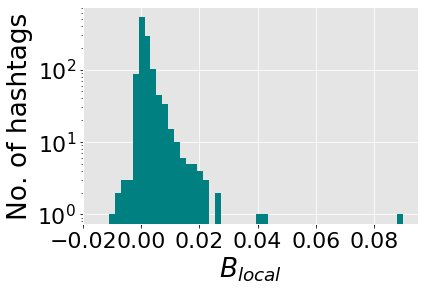

In [22]:
plt.hist(local_bias.values(), bins=50, color='teal')
plt.yscale('log')
plt.ylabel("No. of hashtags")
plt.xlabel("$B_{local}$")
plt.xticks([-0.02, 0.0, 0.02, 0.04, 0.06, 0.08])
plt.savefig("Plots/local_bias_histogram.pdf", bbox_inches='tight')
plt.show()

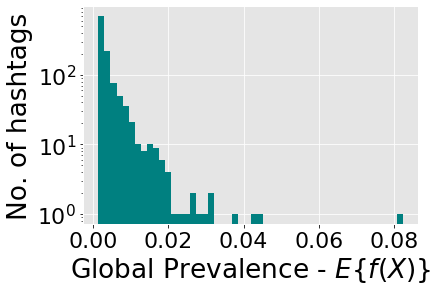

In [23]:
plt.clf()
plt.hist(expected_fx.values(), bins=50, color='teal')
plt.yscale('log')
plt.ylabel("No. of hashtags")
plt.xlabel("Global Prevalence - $E\{f(X)\}$")
plt.savefig("Plots/expected_fx_histogram.pdf", bbox_inches='tight')
plt.show()

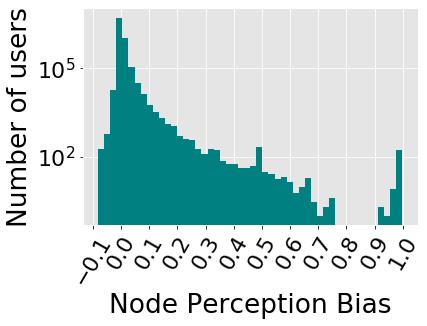

In [24]:
plt.clf()

plt.hist(all_individual_local_bias, bins=50, color='teal')

plt.yscale('log')
plt.ylabel("Number of users")
plt.xlabel("Node Perception Bias")
plt.xticks(np.arange(-0.1, 1.01, 0.1), rotation=60)
plt.savefig("Plots/individual_local_bias.pdf", bbox_inches='tight')
plt.show()

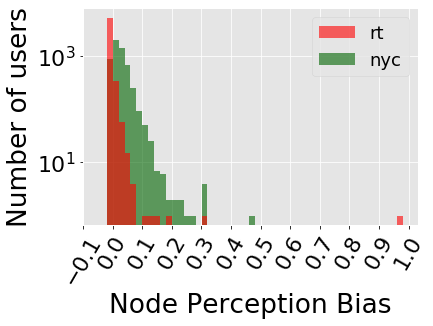

In [25]:
plt.clf()

_, bins, _ = plt.hist(get_individual_local_bias('rt'), bins=50, color='red', label='rt', alpha=0.6, zorder=2)
plt.hist(get_individual_local_bias('nyc'), bins=bins, color='darkgreen', label='nyc', alpha=0.6, zorder=1)

plt.yscale('log')
plt.ylabel("Number of users")
plt.xlabel("Node Perception Bias")
plt.xticks(np.arange(-0.1, 1.01, 0.1), rotation=60)
plt.legend(prop={'size': 18})
plt.savefig("Plots/compare_nyc_rt.pdf", bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

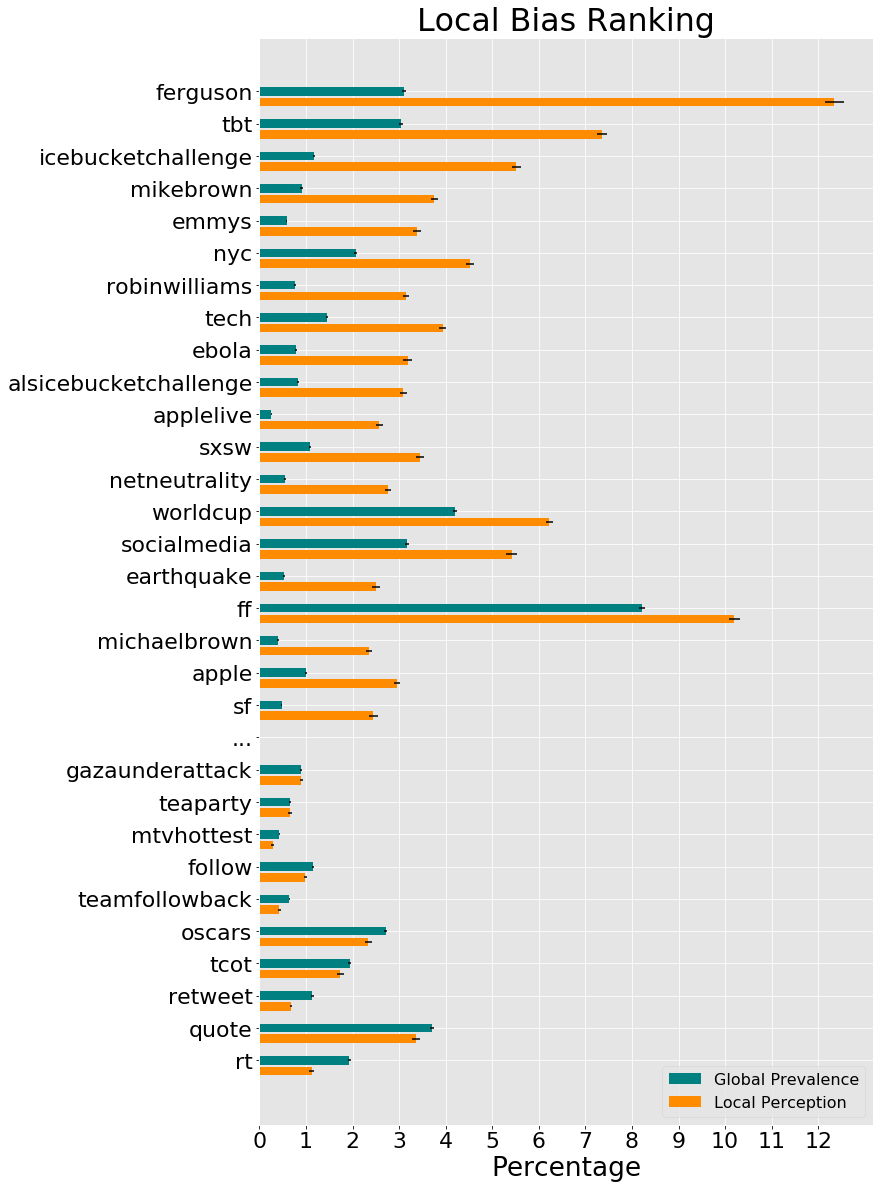

In [26]:
plt.clf()
fig, ax = plt.subplots()

y_pos_local = np.arange(1, 3 * len(rank_hashtag_local_bias) + 1, 3)
y_pos_global = y_pos_local - 1.0

ax.barh(y_pos_global, rank_global_prevalance, xerr=rank_global_prevalance_err, align='center', color='teal', ecolor='black', label='Global Prevalence')
ax.barh(y_pos_local, rank_local_prevalance, xerr=rank_local_prevalance_err, align='center', color='darkorange', ecolor='black', label='Local Perception')

ax.set_yticks(y_pos_global)
ax.set_xticks(np.arange(0, 0.13, 0.01))

ax.set_yticklabels(rank_hashtag_local_bias)
ax.set_xticklabels(np.arange(0, 13, 1))
ax.set_xlabel('Percentage')

ax.invert_yaxis()

ax.set_title('Local Bias Ranking')
fig.set_size_inches(11,20)
plt.legend(loc=4, prop={'size': 16})
plt.savefig('Plots/local_bias_ranking.pdf', bbox_inches='tight')
plt.show()

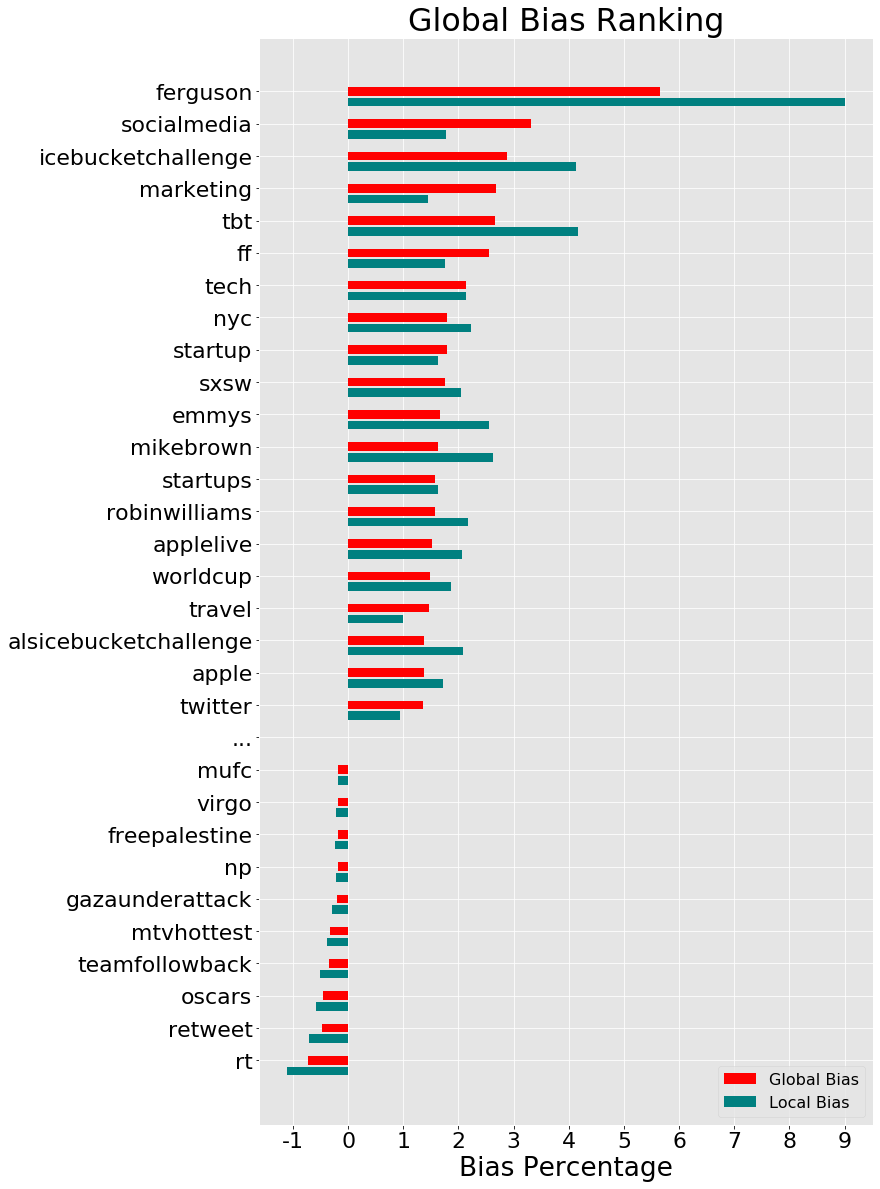

In [27]:
fig, ax = plt.subplots()

y_pos_local = np.arange(1, 3 * len(rank_hashtag_global_bias) + 1, 3)
y_pos_global = y_pos_local - 1.0

ax.barh(y_pos_global, rank_global_bias, align='center', color='red', ecolor='black', label='Global Bias')
ax.barh(y_pos_local, rank_local_bias, align='center', color='teal', ecolor='black', label='Local Bias')

ax.set_yticks(y_pos_global)
ax.set_xticks(np.arange(-0.01, 0.10, 0.01))

ax.set_yticklabels(rank_hashtag_global_bias)
ax.set_xticklabels(np.arange(-1, 10))
ax.set_xlabel('Bias Percentage')

ax.invert_yaxis()

ax.set_title('Global Bias Ranking')
fig.set_size_inches(11,20)
plt.legend(loc=4, prop={'size': 16})
plt.savefig('Plots/global_bias_ranking.pdf', bbox_inches='tight')
plt.show()

case 0 = 474
case 1 = 187
case 2 = 19
case 3 = 75
case 4 = 398


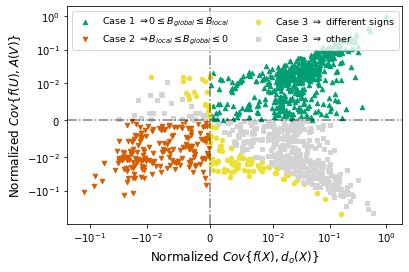

In [8]:
import seaborn as sns

case_x = [[], [], [], [], []]
case_y = [[], [], [], [], []]
case_hashtags = [[], [], [], [], []]

max_fx_dout = float(max(cov_fx_dout.values()))
max_fu_av = float(max(cov_fu_av.values()))

for hsh in important_hashtags:
    g_bias = global_bias[hsh]
    l_bias = local_bias[hsh]
    if 0 <= g_bias and g_bias <= l_bias:
        case_x[0].append(cov_fx_dout[hsh] / max_fx_dout)
        case_y[0].append(cov_fu_av[hsh] / max_fu_av)
        case_hashtags[0].append(hsh)
    elif l_bias <= g_bias and g_bias <= 0:
        case_x[1].append(cov_fx_dout[hsh] / max_fx_dout)
        case_y[1].append(cov_fu_av[hsh] / max_fu_av)
        case_hashtags[1].append(hsh)
    elif g_bias <= 0 and l_bias >= 0:
        case_x[2].append(cov_fx_dout[hsh] / max_fx_dout)
        case_y[2].append(cov_fu_av[hsh] / max_fu_av)
        case_hashtags[2].append(hsh)
    elif g_bias >= 0 and l_bias <= 0:
        case_x[3].append(cov_fx_dout[hsh] / max_fx_dout)
        case_y[3].append(cov_fu_av[hsh] / max_fu_av)
        case_hashtags[3].append(hsh)
    else:
        case_x[4].append(cov_fx_dout[hsh] / max_fx_dout)
        case_y[4].append(cov_fu_av[hsh] / max_fu_av)
        case_hashtags[4].append(hsh)
        
    
cols = sns.color_palette("colorblind", 10)
cls = [cols[2], cols[3], cols[8], cols[8], 'lightgray']
mrk = ['^', 'v', 'o', 'o', 's']
lbl = ['Case 1 $\Rightarrow 0 \leq B_{global} \leq B_{local}$', 
       'Case 2 $\Rightarrow B_{local} \leq B_{global} \leq 0$', 
       'Case 3 $\Rightarrow$ different signs', 
       '',
       'Case 3 $\Rightarrow$ other']
for ind in range(5):
    plt.scatter(case_x[ind], case_y[ind], color=cls[ind], s=20, label=lbl[ind], marker=mrk[ind])
    print ("case {} = {}".format(ind, len(case_x[ind])))

plt.axhline(0, color='black', linestyle='-.', alpha=0.5)
plt.axvline(0, color='black', linestyle='-.', alpha=0.5)
plt.xscale('symlog', linthreshx=0.01)
plt.yscale('symlog', linthreshy=0.01)
plt.ylabel('Normalized $Cov\{f(U), A(V)\}$', fontsize=12)
plt.xlabel('Normalized $Cov\{f(X), d_{o}(X)\}$', fontsize=12)
plt.legend(loc='upper left', ncol=2, fontsize=9.5)
plt.savefig("Plots/cov_cases.pdf", bbox_inches='tight')
plt.show()

In [9]:
pickle.dump(case_x, open("store_results/case_x.p", "wb"))
pickle.dump(case_y, open("store_results/case_y.p", "wb"))
pickle.dump(case_hashtags, open("store_results/case_hashtags.p", "wb"))

# 2.3 Estimating Global Prevalence via Polling

### Preprocessing

In [17]:
pos_deg_graph = pd.read_csv("Data/User_graph.csv")
pos_deg_nodes = list(set(pos_deg_graph['from']).intersection(set(pos_deg_graph['to'])))

while len(pos_deg_nodes) > 0:
    pos_deg_graph = pos_deg_graph.loc[(pos_deg_graph['from'].isin(pos_deg_nodes)) & (pos_deg_graph['to'].isin(pos_deg_nodes))]
    remained_nodes = list(set(pos_deg_graph['from']).intersection(set(pos_deg_graph['to'])))
    
    if len(remained_nodes) < len(pos_deg_nodes):
        pos_deg_nodes = remained_nodes
    else:
        break
pos_deg_nodes = np.array(pos_deg_nodes)
print ("Number of remained nodes = {}".format(len(pos_deg_nodes)))
print ("Number of remained edges = {}".format(len(pos_deg_graph)))


actions = pd.read_csv("Data/large_actions.csv")
actions = actions.loc[actions['user'].isin(pos_deg_nodes)]
actions = actions.drop_duplicates(['user', 'hashtag'])
actions = actions[actions.groupby('hashtag').user.transform(len) > 56] # 1 percent of the network
important_hashtags = list(set(actions['hashtag']))
print ("Number of important hashtags = {}".format(len(important_hashtags)))

actions_gr = actions.groupby('hashtag')['user'].apply(list)
print ("Number of actions-hashtags = {}".format(len(actions_gr)))

Number of remained nodes = 5409
Number of remained edges = 678625
Number of important hashtags = 503
Number of actions-hashtags = 503


In [18]:
pos_deg_outdeg = pos_deg_graph.groupby(['to']).size().to_dict()
pos_deg_indeg = pos_deg_graph.groupby(['from']).size().to_dict()

In [19]:
qf = dict()
efx = dict()
for hsh in important_hashtags:
    print (hsh, end = ' ')
    efx[hsh] = float(len(set(actions_gr[hsh]))) / float(len(pos_deg_nodes))
    qf[hsh] = dict()
    for usr in pos_deg_nodes:
        neighs = list(pos_deg_graph.loc[pos_deg_graph['from'] == usr]['to'])
        neigh_count = len(set(actions_gr[hsh]).intersection(set(neighs)))
        qf[hsh][usr] = float(neigh_count) / float(pos_deg_indeg[usr])

london yes ad foodie photography chicago nasa bike microsoft als friday nyfw baseball followfriday boom dessert boston sales canada media austin adventure ux apple amazing truth delicious commoncore russia vacation firstworldproblems smallbiz spon netneutrality green work explainafilmplotbadly happiness parents boulder innovation starbucks phx vote robinwilliams wwdc quotes indyref tgif motivation nmos14 friends privacy phoenix content career cmworld gratitude justsayin runkeeper usmnt twitter vegas free beach startups sigh solar alsicebucketchallenge excited oakland learning travel handsupdontshoot mexico lol humblebrag isis justiceformikebrown books sandy edtechchat bacon diet happy nationaldogday wedding esurancesave30 nowplaying running sad energy chocolate music syria laborday diversity dinner nyc spotify bigdata philly run dog win tbt france amazon stem yoga fathersday edchat healthcare beer germany starwars dataviz startrek china education ferguson iftheygunnedmedown mhealth fun

In [20]:
pickle.dump(qf, open("store_results/polling_expected_q_f.p", "wb"))
pickle.dump(efx, open("store_results/polling_expected_efx.p", "wb"))

In [21]:
itr_times = 200
def get_IP(hsh, b):
    estimates = []
    for itr in range(itr_times):
        chosen_idx = np.random.choice(len(pos_deg_nodes), replace=True, size=b) 
        s = np.array(pos_deg_nodes)[chosen_idx]
        estimate = sum(np.in1d(s, actions_gr[hsh])) / float(b)
        estimates.append(estimate)
    return mean_std_confidence_interval(estimates)

def get_NPP(hsh, b):
    estimates = []
    for itr in range(itr_times):
        chosen_idx = np.random.choice(len(pos_deg_nodes), replace=True, size=b)
        s = np.array(pos_deg_nodes)[chosen_idx]
        estimate = 0.0
        for v in s:
            estimate += qf[hsh][v]
        estimate = float(estimate) / float(b)
        estimates.append(estimate)
    return mean_std_confidence_interval(estimates)

def get_FPP(hsh, b):
    estimates = []
    for itr in range(itr_times):
        chosen_idx = np.random.choice(len(pos_deg_graph), replace=True, size=b)
        s = np.array(pos_deg_graph.iloc[chosen_idx]['from'])
        estimate = 0.0
        for v in s:
            estimate += qf[hsh][v]
        estimate = float(estimate) / float(b)
        estimates.append(estimate)
    return mean_std_confidence_interval(estimates)


In [24]:
b = 25 

IP_bias, IP_var = {}, {}
NPP_bias, NPP_var = {}, {}
FPP_bias, FPP_var = {}, {}

for hsh in important_hashtags:
    print (hsh, end = ' ')
    m, v, c = get_IP(hsh, b)
    IP_bias[hsh], IP_var[hsh] = m - efx[hsh], v
    
    m, v, c = get_NPP(hsh, b)
    NPP_bias[hsh], NPP_var[hsh] = m - efx[hsh], v
    
    m, v, c = get_FPP(hsh, b)
    FPP_bias[hsh], FPP_var[hsh] = m - efx[hsh], v
    

london yes ad foodie photography chicago nasa bike microsoft als friday nyfw baseball followfriday boom dessert boston sales canada media austin adventure ux apple amazing truth delicious commoncore russia vacation firstworldproblems smallbiz spon netneutrality green work explainafilmplotbadly happiness parents boulder innovation starbucks phx vote robinwilliams wwdc quotes indyref tgif motivation nmos14 friends privacy phoenix content career cmworld gratitude justsayin runkeeper usmnt twitter vegas free beach startups sigh solar alsicebucketchallenge excited oakland learning travel handsupdontshoot mexico lol humblebrag isis justiceformikebrown books sandy edtechchat bacon diet happy nationaldogday wedding esurancesave30 nowplaying running sad energy chocolate music syria laborday diversity dinner nyc spotify bigdata philly run dog win tbt france amazon stem yoga fathersday edchat healthcare beer germany starwars dataviz startrek china education ferguson iftheygunnedmedown mhealth fun

In [25]:
pickle.dump([IP_bias, IP_var], open("store_results/polling_IP_results.p", "wb"))
pickle.dump([NPP_bias, NPP_var], open("store_results/polling_NPP_results.p", "wb"))
pickle.dump([FPP_bias, FPP_var], open("store_results/polling_FPP_results.p", "wb"))

In [26]:
worse_than_NPP = dict()
worse_than_IP = dict()
for b in range(10, 260, 5):
    print (b, end = ' ')
    worse_than_NPP[b] = []
    worse_than_IP[b] = []
    for hsh in important_hashtags:
        m0, v0, _ = get_IP(hsh, b)
        m1, v1, _ = get_NPP(hsh, b)
        m2, v2, _ = get_FPP(hsh, b)
        
        if (v0 + (m0 - efx[hsh])**2) < (v2 + (m2 - efx[hsh])**2):
            worse_than_IP[b].append(hsh)
        if (v1 + (m1 - efx[hsh])**2) < (v2 + (m2 - efx[hsh])**2):
            worse_than_NPP[b].append(hsh)
    
    print (len(worse_than_IP[b]), len(worse_than_NPP[b]))

10 0 71
15 1 89
20 1 100
25 3 106
30 4 117
35 5 125
40 7 140
45 8 137
50 11 148
55 13 154
60 19 158
65 20 168
70 23 161
75 28 169
80 30 171
85 32 169
90 36 183
95 41 181
100 39 176
105 47 184
110 45 190
115 45 192
120 49 194
125 48 197
130 52 193
135 53 195
140 58 195
145 57 203
150 58 203
155 63 203
160 61 199
165 68 207
170 69 206
175 67 208
180 75 209
185 74 207
190 75 205
195 79 215
200 80 212
205 79 213
210 85 215
215 83 215
220 84 216
225 89 215
230 89 216
235 91 220
240 99 220
245 96 221
250 101 219
255 100 225


In [27]:
pickle.dump([worse_than_IP, worse_than_NPP], open("store_results/polling_FPP_worse_than.p", "wb"))

### Plots

In [28]:
X = [el[0] for el in sorted(efx.items())]

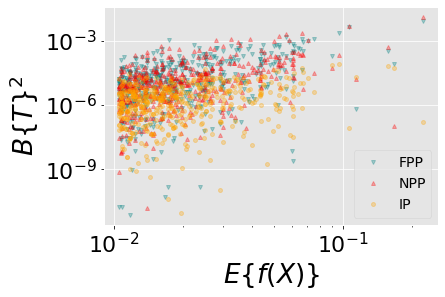

In [29]:
plt.clf()
plt.errorbar([efx[x] for x in X], [FPP_bias[x]**2 for x in X], linestyle='', marker='v', markersize=4, color='teal', label='FPP', alpha=0.3)
plt.errorbar([efx[x] for x in X], [NPP_bias[x]**2 for x in X], linestyle='', marker='^', markersize=4, color='red', label='NPP', alpha=0.3)
plt.errorbar([efx[x] for x in X], [IP_bias[x]**2 for x in X], linestyle='', marker='o', markersize=4, color='orange', label='IP', alpha=0.3)

plt.xlabel("$E\{f(X)\}$")
plt.ylabel("$B\{T\}^2$")
#plt.yscale('symlog', linthreshy=0.000001)
plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 14})
#plt.yticks([-0.01, 0.0, 0.01, 0.1], [-0.01, 0.0, 0.01, 0.1])
plt.savefig("Plots/nonzero_estimate_bias_without_c_squared.pdf", bbox_inches='tight')
plt.show()

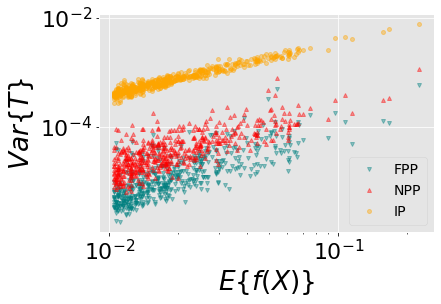

In [30]:
plt.clf()
plt.errorbar([efx[x] for x in X], [FPP_var[x] for x in X], linestyle='', marker='v', markersize=4, color='teal', label='FPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [NPP_var[x] for x in X], linestyle='', marker='^', markersize=4, color='red', label='NPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [IP_var[x] for x in X], linestyle='', marker='o', markersize=4, color='orange', label='IP', alpha=0.4)

plt.xlabel("$E\{f(X)\}$")
plt.ylabel("$Var\{T\}$")
plt.xscale('log')
plt.yscale('log')
#plt.ylim([-0.001, 0.03])
plt.legend(prop={'size': 14})
plt.savefig("Plots/nonzero_variance.pdf", bbox_inches='tight')
plt.show()

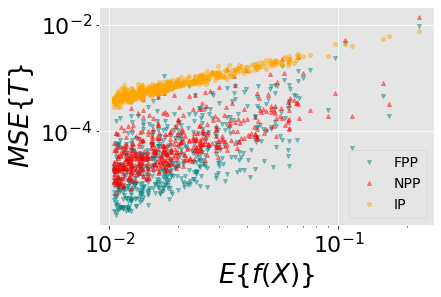

In [31]:
plt.clf()
plt.errorbar([efx[x] for x in X], [FPP_bias[x]**2 + FPP_var[x] for x in X], linestyle='', marker='v', markersize=4, color='teal', label='FPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [NPP_bias[x]**2 + NPP_var[x] for x in X], linestyle='', marker='^', markersize=4, color='red', label='NPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [IP_bias[x]**2 + IP_var[x] for x in X], linestyle='', marker='o', markersize=4, color='orange', label='IP', alpha=0.4)

plt.xlabel("$E\{f(X)\}$")
plt.ylabel("$MSE\{T\}$")
plt.xscale('log')
plt.yscale('log')
#plt.ylim([-0.001, 0.03])
plt.legend(prop={'size': 14})
plt.savefig("Plots/nonzero_MSE.pdf", bbox_inches='tight')
plt.show()

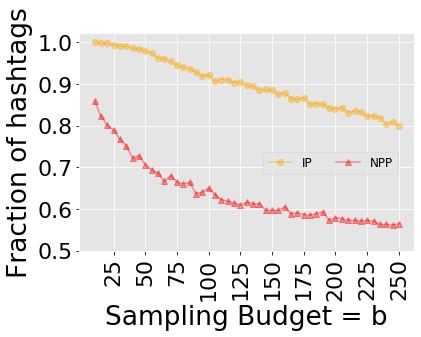

In [32]:
X = []
Y_IP = []
Y_NPP = []
for b in range(10, 255, 5):
    X.append(b)
    Y_IP.append(1 - float(len(worse_than_IP[b])) / float(len(important_hashtags)))
    Y_NPP.append(1 - float(len(worse_than_NPP[b])) / float(len(important_hashtags)))

plt.clf()
plt.plot(X, Y_IP, linestyle='-', marker='o', markersize=6, color='orange', label='IP', alpha=0.4)
plt.plot(X, Y_NPP, linestyle='-', marker='^', markersize=6, color='red', label='NPP', alpha=0.4)

plt.xlabel("Sampling Budget = b")
plt.ylabel("Fraction of hashtags")
plt.legend(prop={'size': 12}, ncol=2, loc=(0.55, 0.35))
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks([25, 50, 75, 100, 125, 150, 175, 200, 225, 250], rotation=90)
plt.savefig("Plots/FPP_better.pdf", bbox_inches='tight')
plt.show()